In [2]:
## only consider cis
## random sample as control

In [4]:
import pandas as pd
import numpy as np
import itertools
import plotly.graph_objects as go
import plotly.io as pio
pio.kaleido.scope.default_format = "pdf"
from matplotlib.colors import ListedColormap
import matplotlib.colors as mc
import matplotlib.pyplot as plt
from plotly.offline import plot
import itertools
import sys
sys.path.insert(0, '/home/data4/jh/data/tools/customized/tadtools/tadtool_pkg')
import utils as ut
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
import seaborn as sns

In [2]:
def extract(a,dense_pixel_cis):
    return (dense_pixel_cis.iloc[:,1]>=a[0]) & (dense_pixel_cis.iloc[:,4]>=a[0]) & (dense_pixel_cis.iloc[:,2]<=a[1]) & (dense_pixel_cis.iloc[:,5]<=a[1])

In [5]:
a1a1_tad = pd.read_csv('../ipy/data/A1A1.bed', header=None, sep='\t')
a1a2_tad = pd.read_csv('../ipy/data/A1A2.bed', header=None, sep='\t')
a2a2_tad = pd.read_csv('../ipy/data/A2A2.bed', header=None, sep='\t')
s1s1_tad = pd.read_csv('../ipy/data/I1I1.bed', header=None, sep='\t')
s1s2_tad = pd.read_csv('../ipy/data/I1I2.bed', header=None,sep='\t')
s2s2_tad = pd.read_csv('../ipy/data/I2I2.bed', header=None,sep='\t')
sa1sa1_tad = pd.read_csv('../ipy/data/SA1SA1.bed', header=None, sep='\t')
sa1sa2_tad = pd.read_csv('../ipy/data/SA1SA2.bed', header=None,sep='\t')
sa2sa2_tad = pd.read_csv('../ipy/data/SA2SA2.bed', header=None,sep='\t')

#sa_tad =  pd.read_csv('../data/Agglo_Cluster3.tsv', skiprows=1, header=None, sep='\t',usecols=[0,1,2])
#random_tad = pd.read_csv('random_TADs.bed', header=None,sep='\t')

def extract_chr(chrstr,type_tad):
    dense_pixel = pd.read_csv(f'{chrstr}.bedpe',header=None,sep='\t')
    dense_pixel_cis = dense_pixel.loc[dense_pixel.iloc[:,3]==chrstr,:].reindex()
    type_tad_chr = type_tad.loc[type_tad.iloc[:,0]==chrstr,[1,2]].to_numpy()
    union_tad = []
    for row in type_tad_chr:
        if union_tad and union_tad[-1][1] >= row[0]-1:
            union_tad[-1][1] = max(union_tad[-1][1],row[1])
        else:
            union_tad.append([row[0],row[1]])
    chr_result = list(map(extract,union_tad,itertools.repeat(dense_pixel_cis, len(union_tad))))
    chr_all = list(map(bool,sum(chr_result)))
    return dense_pixel_cis.loc[chr_all,:].reindex()

In [6]:
## chrstr extract from tad.bed
def write_interaction(tad, name):
    result_list = []
    for chrstr in tad.iloc[:,0].unique():
        result_list.append(extract_chr(chrstr,tad))
    cis_tad = pd.concat(result_list, axis=0, join='outer', ignore_index=True, keys=None,
              levels=None, names=None, verify_integrity=False, copy=True)
    cis_tad.to_csv(f'{name}_cis_TAD.bedpe',index=False,header=False,sep='\t')

In [19]:
write_interaction(a1a2_tad, 'A1A2')

In [20]:
write_interaction(a2a2_tad, 'A2A2')

In [21]:
write_interaction(s1s1_tad, 'S1S1')

In [22]:
write_interaction(s1s2_tad, 'S1S2')

In [23]:
write_interaction(s2s2_tad, 'S2S2')

In [30]:
write_interaction(sa_tad, 'SA')

In [9]:
write_interaction(random_tad, 'random')

In [7]:
write_interaction(sa1sa1_tad, 'SA11')
write_interaction(sa1sa2_tad, 'SA12')
write_interaction(sa2sa2_tad, 'SA22')

In [32]:
# type11_chr = type11_cis_tad.drop(6,axis=1).groupby([0,1,2,3,4,5]).sum()
# type11_dense = pd.DataFrame()
#type11_dense['loc1'] = type11_cis_tad.iloc[:,[0,1,2]].apply(lambda row: '_'.join(map(str,row)),axis=1)
type11_dense['loc2'] = type11_cis_tad.iloc[:,[3,4,5]].apply(lambda row: '_'.join(map(str,row)),axis=1)
type11_dense['value'] = type11_cis_tad.iloc[:,7]
type11_dense_nodiag = type11_dense.iloc[np.where(type11_dense['loc1']!=type11_dense['loc2'])[0],:]
#type11_dense
#type11_cis_tad.iloc[:,[0,1,2,3,4,5]].drop_duplicates()
#type11_chr

In [9]:
a1a1_cis_tad = pd.read_csv('A1A1_cis_TAD.bedpe',sep='\t',header=None)
a1a2_cis_tad = pd.read_csv('A1A2_cis_TAD.bedpe',sep='\t',header=None)
a2a2_cis_tad = pd.read_csv('A2A2_cis_TAD.bedpe',sep='\t',header=None)
s1s1_cis_tad = pd.read_csv('S1S1_cis_TAD.bedpe',sep='\t',header=None)
s1s2_cis_tad = pd.read_csv('S1S2_cis_TAD.bedpe',sep='\t',header=None)
s2s2_cis_tad = pd.read_csv('S2S2_cis_TAD.bedpe',sep='\t',header=None)
sa1sa1_cis_tad = pd.read_csv('SA11_cis_TAD.bedpe',sep='\t',header=None)
sa1sa2_cis_tad = pd.read_csv('SA12_cis_TAD.bedpe',sep='\t',header=None)
sa2sa2_cis_tad = pd.read_csv('SA22_cis_TAD.bedpe',sep='\t',header=None)
# sa_cis_tad = pd.read_csv('SA_cis_TAD.bedpe',sep='\t',header=None)
random_cis_tad = pd.read_csv('random_cis_TAD.bedpe',sep='\t',header=None)
# random_1 = pd.read_csv('type1_random.mat',sep='\t',header=None,usecols=[7])
# random_2 = pd.read_csv('type2_random.mat',sep='\t',header=None,usecols=[7])
# random_3 = pd.read_csv('type3_random.mat',sep='\t',header=None,usecols=[7])
# random_4 = pd.read_csv('type4_random.mat',sep='\t',header=None,usecols=[7])

In [11]:
def remove_dup(cis_tad):
    dense = pd.DataFrame()
    dense['loc1'] = cis_tad.iloc[:,[0,1,2]].apply(lambda row: '_'.join(map(str,row)),axis=1)
    dense['loc2'] = cis_tad.iloc[:,[3,4,5]].apply(lambda row: '_'.join(map(str,row)),axis=1)
    dense['value'] = cis_tad.iloc[:,7]
    dense_nodiag = dense.iloc[np.where(dense['loc1']!=dense['loc2'])[0],:]
    return dense_nodiag
a1a1_nodiag = remove_dup(a1a1_cis_tad)
a1a2_nodiag = remove_dup(a1a2_cis_tad)
a2a2_nodiag = remove_dup(a2a2_cis_tad)
s1s1_nodiag = remove_dup(s1s1_cis_tad)
s1s2_nodiag = remove_dup(s1s2_cis_tad)
s2s2_nodiag = remove_dup(s2s2_cis_tad)
sa1sa1_nodiag = remove_dup(sa1sa1_cis_tad)
sa1sa2_nodiag = remove_dup(sa1sa2_cis_tad)
sa2sa2_nodiag = remove_dup(sa2sa2_cis_tad)
#sa_nodiag = remove_dup(sa_cis_tad)
random_nodiag = remove_dup(random_cis_tad)
#sa_nodiag_tad = sa_nodiag.groupby(['loc1']).mean()
sa1sa1_nodiag_tad = sa1sa1_nodiag.groupby(['loc1']).mean()
sa1sa2_nodiag_tad = sa1sa2_nodiag.groupby(['loc1']).mean()
sa2sa2_nodiag_tad = sa2sa2_nodiag.groupby(['loc1']).mean()
a1a1_nodiag_tad = a1a1_nodiag.groupby(['loc1']).mean()
a1a2_nodiag_tad = a1a2_nodiag.groupby(['loc1']).mean()
a2a2_nodiag_tad = a2a2_nodiag.groupby(['loc1']).mean()
s1s1_nodiag_tad = s1s1_nodiag.groupby(['loc1']).mean()
s1s2_nodiag_tad = s1s2_nodiag.groupby(['loc1']).mean()
s2s2_nodiag_tad = s2s2_nodiag.groupby(['loc1']).mean()
random_nodiag_tad = random_nodiag.groupby(['loc1']).mean()
#s2s2_nodiag_tad['value']

In [14]:
data_list = [sa1sa1_nodiag_tad,sa1sa2_nodiag_tad,sa2sa2_nodiag_tad,a1a1_nodiag_tad,a1a2_nodiag_tad,a2a2_nodiag_tad,s1s1_nodiag_tad,s1s2_nodiag_tad,s2s2_nodiag_tad]
value_list = map(lambda x: x['value'].to_numpy(),data_list)

In [12]:
fig = go.Figure()
# fig.add_trace(go.Box(
#     y=sa_nodiag_tad['value'].to_numpy(),
#     name="SA",
#     jitter=0.3,
#     boxpoints=False,
#     boxmean='sd'
# #     pointpos=-1.8,
# #     boxpoints='all' # represent all points
# #     marker_color='rgb(7,40,89)',
# #     line_color='rgb(7,40,89)'
# ))

fig.add_trace(go.Box(
    y=sa1sa1_nodiag_tad['value'].to_numpy(),
    name="SA11",
    jitter=0.3,
    boxpoints=False,
    boxmean='sd'
))
fig.add_trace(go.Box(
    y=sa1sa2_nodiag_tad['value'].to_numpy(),
    name="SA12",
    jitter=0.3,
    boxpoints=False,
    boxmean='sd'
))
fig.add_trace(go.Box(
    y=sa2sa2_nodiag_tad['value'].to_numpy(),
    name="SA22",
    jitter=0.3,
    boxpoints=False,
    boxmean='sd'
))



# fig.add_trace(go.Box(
#     y=random_1[7],
#     name="Random Sample(999346)",
#     jitter=0.3,
#     boxpoints=False,
#     boxmean='sd'
# #     pointpos=-1.8,
# #     boxpoints='all', 
# #     marker_color='rgb(9,56,125)',
# #     line_color='rgb(9,56,125)'
# ))
fig.add_trace(go.Box(
    y=a1a1_nodiag_tad['value'].to_numpy(),
    name="A11",
    jitter=0.3,
    boxpoints=False,
    boxmean='sd'
#     pointpos=-1.8,
#     boxpoints='all' # represent all points
#     marker_color='rgb(7,40,89)',
#     line_color='rgb(7,40,89)'
))

# fig.add_trace(go.Box(
#     y=random_2[7],
#     name="Random Sample(222726)",
#     jitter=0.3,
#     boxpoints=False,
#     boxmean='sd'
# #     pointpos=-1.8,
# #     boxpoints='all', 
# #     marker_color='rgb(9,56,125)',
# #     line_color='rgb(9,56,125)'
# ))
fig.add_trace(go.Box(
    y=a1a2_nodiag_tad['value'].to_numpy(),
    name="A12",
    jitter=0.3,
    boxpoints=False,
    boxmean='sd'
#     pointpos=-1.8,
#     boxpoints='all' # represent all points
#     marker_color='rgb(7,40,89)',
#     line_color='rgb(7,40,89)'
))

# fig.add_trace(go.Box(
#     y=random_3[7],
#     name="Random Sample(9534)",
#     jitter=0.3,
#     boxpoints=False,
#     boxmean='sd'
# #     pointpos=-1.8,
# #     boxpoints='all', 
# #     marker_color='rgb(9,56,125)',
# #     line_color='rgb(9,56,125)'
# ))
fig.add_trace(go.Box(
    y=a2a2_nodiag_tad['value'].to_numpy(),
    name="A22",
    jitter=0.3,
    boxpoints=False,
    boxmean='sd'
#     pointpos=-1.8,
#     boxpoints='all' # represent all points
#     marker_color='rgb(7,40,89)',
#     line_color='rgb(7,40,89)'
))
fig.add_trace(go.Box(
    y=s1s1_nodiag_tad['value'].to_numpy(),
    name="S11",
    jitter=0.3,
    boxpoints=False,
    boxmean='sd'
))
fig.add_trace(go.Box(
    y=s1s2_nodiag_tad['value'].to_numpy(),
    name="S12",
    jitter=0.3,
    boxpoints=False,
    boxmean='sd'
))
fig.add_trace(go.Box(
    y=s2s2_nodiag_tad['value'].to_numpy(),
    name="S22",
    jitter=0.3,
    boxpoints=False,
    boxmean='sd'
))
# fig.add_trace(go.Box(
#     y=random_nodiag_tad['value'].to_numpy(),
#     name="Random sampled",
#     jitter=0.3,
#     boxpoints=False,
#     boxmean='sd'
# ))

# fig.add_trace(go.Box(
#     y=random_1[7],
#     name="Random Sample(239419)",
#     jitter=0.3,
#     boxpoints=False,
#     boxmean='sd'
# #     pointpos=-1.8,
# #     boxpoints='all', 
# #     marker_color='rgb(9,56,125)',
# #     line_color='rgb(9,56,125)'
# ))


# fig.add_annotation(
#             x='Type 2',
#             y=480,
#             text="****",
# showarrow=False)
# fig.add_annotation(
#             x='Type 3',
#             y=480,
#             text="**",
# showarrow=False)
# fig.add_annotation(
#             x='Type 4',
#             y=480,
#             text="****",
# showarrow=False)
fig.update_layout(template='simple_white',title_text='cis interaction by type',xaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                yaxis = dict(showgrid=False, ticks='inside',mirror=True,showline=True),
                font=dict(size=18),
                 title_x=0.5,
                 showlegend=False)
# fig.show()
# plot(fig)
fig.write_image('mean_interactiontadbytype_9.pdf')


In [9]:
def extract_tad_chr(chrstr,type_tad):
    dense_pixel = pd.read_csv(f'{chrstr}.bedpe',header=None,sep='\t')
    dense_pixel_cis = dense_pixel.loc[dense_pixel.iloc[:,3]==chrstr,:].reindex()
    type_tad_chr = type_tad.loc[type_tad.iloc[:,0]==chrstr,['start','end']].to_numpy()
    cis = []
    tad_chr = pd.DataFrame()
    tad_chr[['chr','start','end']] = type_tad.loc[type_tad.iloc[:,0]==chrstr,:]
    for row in type_tad_chr:
        tad_cis = sum(dense_pixel_cis.iloc[np.where((dense_pixel_cis.iloc[:,1]>=row[0]) & (dense_pixel_cis.iloc[:,4]>=row[0]) & (dense_pixel_cis.iloc[:,2]<=row[1]) & (dense_pixel_cis.iloc[:,5]<=row[1]))[0],7].dropna())
        cis.append(tad_cis)
    tad_chr['value'] = cis
    return tad_chr

In [15]:
#interaction_list = [p1_cis_tad.iloc[:,3],p2_cis_tad.iloc[:,3],p3_cis_tad.iloc[:,3],p4_cis_tad.iloc[:,3],p5_cis_tad.iloc[:,3],p6_cis_tad.iloc[:,3],p7_cis_tad.iloc[:,3]]
interaction_pair = list(itertools.combinations(value_list,2))
#print(len(fpkm_pair))
from scipy.stats import mannwhitneyu
ps = []
for pair in interaction_pair:
    #print(pair[1])
    stat, p = mannwhitneyu(pair[0], pair[1])
    ps.append(p)

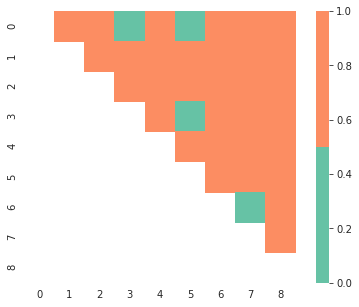

In [20]:
def plot_sig(ps):
    arr = np.zeros((9,9))
    indices = np.triu_indices(9,1)
    arr[indices] = ps
    arr_sig = np.where(arr<0.05,1,0)
    #ps_if_arr = -np.log10(arr)
    mask = np.zeros_like(arr) 
    mask[np.tril_indices_from(mask)] = True
    tab10 = cm.get_cmap('tab10')
    colors = ["white",tab10(3)]
    cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
    cmap2 = sns.color_palette("Set2",2)

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(7, 5))
        #ax = sns.heatmap(ps_if_arr, mask=mask, vmin=0, vmax=5, square=True,cmap=cmap1)
        ax = sns.heatmap(arr_sig, mask=mask, square=True,cmap=cmap2)
        f.savefig(f'tt_interaction_sig_9.pdf',bbox_inches='tight')
plot_sig(ps)

In [10]:
## chrstr extract from tad.bed

result_list = []
for chrstr in p1_tad.iloc[:,0].unique():
    result_list.append(extract_tad_chr(chrstr,p1_tad))

In [10]:
p1_cis_tad = pd.concat(result_list, axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
p1_cis_tad.to_csv('Agglo_C1_TAD_withsamegroup.bedpe',index=False,header=False,sep='\t')

In [3]:
p1_cis_tad = pd.read_csv('P1_TAD_withsamegroup.bedpe',sep='\t',header=None)
p2_cis_tad = pd.read_csv('P2_TAD_withsamegroup.bedpe',sep='\t',header=None)
p3_cis_tad = pd.read_csv('P3_TAD_withsamegroup.bedpe',sep='\t',header=None)
p4_cis_tad = pd.read_csv('P4_TAD_withsamegroup.bedpe',sep='\t',header=None)
p5_cis_tad = pd.read_csv('P5_TAD_withsamegroup.bedpe',sep='\t',header=None)
p6_cis_tad = pd.read_csv('P6_TAD_withsamegroup.bedpe',sep='\t',header=None)
p7_cis_tad = pd.read_csv('P7_TAD_withsamegroup.bedpe',sep='\t',header=None)

In [12]:
p7_cis_tad

,0,1,2,3
0,chr1,4840000,6200000,21.226887
1,chr1,6240000,63120000,1290.589944
2,chr1,63160000,64640000,20.987563
3,chr1,64680000,117560000,1127.278633
4,chr1,117600000,118280000,8.569305
...,...,...,...,...
393,chr19,41880000,42120000,0.000000
394,chr19,42160000,46040000,0.000000
395,chr19,46080000,46520000,0.000000
396,chr19,46560000,53000000,0.000000
